In [2]:
import pandas as pd
import numpy as np
import random

np.random.seed(99999)
random.seed(99999)
TRAININFO = "/data/HitSongPrediction/train_info.tsv"
TRAINRANK =  "/data/HitSongPrediction/train_rank.csv"
TESTINFO = "/data/HitSongPrediction/test_info.tsv"
SUBMISSION = "/data/HitSongPrediction/submission.csv"

In [3]:
df_i = pd.read_csv(TRAININFO, delimiter='\t',encoding='utf-8')
df_r = pd.read_csv(TRAINRANK)
df_i_train = df_i.merge(df_r, left_on='ID', right_on='ID')
df_i_train["dataset"] = "train"

df_i_test = pd.read_csv(TESTINFO, delimiter='\t',encoding='utf-8')
df_i_test["label"] = -1
df_i_test["dataset"] = "test"

df = pd.concat([df_i_train, df_i_test])
print(len(df))
df_track_info = pd.read_csv("../csv/all_track_info.csv")
df = df.merge(df_track_info, left_on='ID', right_on='ID')
df_audio_features = pd.read_csv("../csv/all_track_audio_features.csv")
df =df.merge(df_audio_features,left_on="ID",right_on="ID", how="left")
for i,o in df.iterrows():
    print(o.album,"--------------------------",o.album_artist,"----",o.artist_name,"--",o.label)
df.columns
# print(len(df))
df.head(10)

10196
30 Năm Viễn Xứ -------------------------- Various Artists ---- Như Quỳnh -- 7
Xin Còn Gọi Tên Nhau-Tình khúc Trường Sa -------------------------- Various Artists ---- Minh Tuyết -- 3
Tình Mộng (Top Hits 29) -------------------------- Various Artists ---- Lưu Bích -- 6
Nối Lại Tình Xưa -------------------------- Various Artists ---- Như Quỳnh -- 2
Tình Lặng Câm -------------------------- Như Loan ---- Như Loan -- 7
Hà Nội Ngày Tháng Cũ (Tình khúc Song Ngọc) -------------------------- Various Artists ---- Don Hồ -- 3
Yêu Một Người Sống Bên Một Người -------------------------- Minh Tuyết ---- Minh Tuyết -- 4
Yêu Một Người Sống Bên Một Người -------------------------- Minh Tuyết ---- Minh Tuyết -- 8
Yêu Một Người Sống Bên Một Người -------------------------- Minh Tuyết ---- Minh Tuyết, Bằng Kiều -- 4
Yêu Một Người Sống Bên Một Người -------------------------- Minh Tuyết ---- Minh Tuyết -- 8
Em Vẫn Tin (Top Hits 33) -------------------------- Various Artists ---- Quỳnh Vi -- 5
Xin Còn

100 Tuyệt Phẩm Hạnh Phúc Trăm Năm -------------------------- Ngọc Sơn ---- Ngọc Sơn -- 2
100 Tuyệt Phẩm Hạnh Phúc Trăm Năm -------------------------- Ngọc Sơn ---- Ngọc Sơn, Nguyễn Phi Hùng -- 3
100 Tuyệt Phẩm Hạnh Phúc Trăm Năm -------------------------- Ngọc Sơn ---- Ngọc Sơn -- 4
100 Tuyệt Phẩm Hạnh Phúc Trăm Năm -------------------------- Ngọc Sơn ---- Ngọc Sơn -- 3
100 Tuyệt Phẩm Hạnh Phúc Trăm Năm -------------------------- Ngọc Sơn ---- Ngọc Sơn, Nguyễn Phi Hùng -- 3
100 Tuyệt Phẩm Hạnh Phúc Trăm Năm -------------------------- Ngọc Sơn ---- Ngọc Sơn, Lâm Ngọc Huỳnh -- 4
100 Tuyệt Phẩm Hạnh Phúc Trăm Năm -------------------------- Ngọc Sơn ---- Ngọc Sơn -- 5
100 Tuyệt Phẩm Hạnh Phúc Trăm Năm -------------------------- Ngọc Sơn ---- Ngọc Sơn -- 4
100 Tuyệt Phẩm Hạnh Phúc Trăm Năm -------------------------- Ngọc Sơn ---- Ngọc Sơn -- 4
100 Tuyệt Phẩm Hạnh Phúc Trăm Năm -------------------------- Ngọc Sơn ---- Ngọc Sơn, Lâm Vũ -- 4
100 Tuyệt Phẩm Hạnh Phúc Trăm Năm ------------------

Chuyện Tình Hoa Pense -------------------------- Hữu Khương, Dương Hồng Loan, Lý Diệu Linh, Lưu Ánh Loan, Hồng Quyên ---- Hữu Khương, Dương Hồng Loan -- 1
Chuyện Tình Hoa Pense -------------------------- Hữu Khương, Dương Hồng Loan, Lý Diệu Linh, Lưu Ánh Loan, Hồng Quyên ---- Hữu Khương -- 8
Chuyện Tình Hoa Pense -------------------------- Hữu Khương, Dương Hồng Loan, Lý Diệu Linh, Lưu Ánh Loan, Hồng Quyên ---- Hữu Khương, Lý Diệu Linh -- 3
Chuyện Tình Hoa Pense -------------------------- Hữu Khương, Dương Hồng Loan, Lý Diệu Linh, Lưu Ánh Loan, Hồng Quyên ---- Hữu Khương, Lưu Ánh Loan -- 3
Chuyện Tình Hoa Pense -------------------------- Hữu Khương, Dương Hồng Loan, Lý Diệu Linh, Lưu Ánh Loan, Hồng Quyên ---- Hữu Khương -- 6
nan -------------------------- nan ---- Ưng Đại Phi -- 7
nan -------------------------- nan ---- Ưng Đại Phi -- 5
Vũ Duy Khánh The Remix 2017 -------------------------- Vũ Duy Khánh ---- Vũ Duy Khánh -- 2
Vũ Duy Khánh The Remix 2017 -------------------------- Vũ Du

nan -------------------------- nan ---- Mon Hoàng Anh, P336 Band -- 2
nan -------------------------- nan ---- Winner, P336 Band -- 3
nan -------------------------- nan ---- P336 Band -- 2
nan -------------------------- nan ---- Mon, Winner, T-Up, Kenji, P336 Band -- 4
nan -------------------------- nan ---- Kira Kira, Vương Tuyền, Kenji, P336 Band -- 3
nan -------------------------- nan ---- P336 Band -- 3
nan -------------------------- nan ---- T-Up, Hailey, P336 Band -- 3
Nụ Hôn Tháng 8 (Single) -------------------------- Hồ Tiến Đạt ---- Hồ Tiến Đạt -- 5
Con Xin Lỗi (Single) -------------------------- Khắc Trung ---- Khắc Trung, Quách Beem -- 2
Sao Phải Khóc (Single) -------------------------- Huyền Nhi ---- Huyền Nhi, PD Seven -- 2
Nhớ Một Người Khóc Một Người -------------------------- Đông Duy ---- Đông Duy -- 6
Nhớ Một Người Khóc Một Người -------------------------- Đông Duy ---- Đông Duy -- 8
Nhớ Một Người Khóc Một Người -------------------------- Đông Duy ---- Đông Duy -- 8
Nh

nan -------------------------- nan ---- Trương Kiều Diễm, Như Trang -- 5
nan -------------------------- nan ---- Lâm Nguyên -- 6
nan -------------------------- nan ---- Lâm Nguyên -- 8
Canh Ngoại Nấu -------------------------- Lê Như ---- Lê Như -- 3
Canh Ngoại Nấu -------------------------- Lê Như ---- Lê Như -- 2
Canh Ngoại Nấu -------------------------- Lê Như ---- Lê Như, Huỳnh Thiên Phúc -- 3
Canh Ngoại Nấu -------------------------- Lê Như ---- Lê Như -- 3
Canh Ngoại Nấu -------------------------- Lê Như ---- Lê Như -- 2
nan -------------------------- nan ---- SlimV, Touliver -- 1
nan -------------------------- nan ---- Chu Bin -- 2
I Lab You (Single) -------------------------- Tiên Tiên ---- Tiên Tiên -- 1
nan -------------------------- nan ---- Nguyễn Hải Yến -- 2
nan -------------------------- nan ---- Nguyễn Hải Yến -- 2
nan -------------------------- nan ---- Nguyễn Hải Yến -- 2
nan -------------------------- nan ---- Nguyễn Hải Yến -- 3
nan -------------------------- nan --

nan -------------------------- nan ---- Nguyễn Ngọc Sơn -- 6
nan -------------------------- nan ---- Nguyễn Ngọc Sơn -- 6
nan -------------------------- nan ---- Nguyễn Ngọc Sơn -- 7
nan -------------------------- nan ---- Nguyễn Ngọc Sơn -- 6
nan -------------------------- nan ---- Nguyễn Ngọc Sơn -- 3
nan -------------------------- nan ---- Nguyễn Ngọc Sơn -- 4
nan -------------------------- nan ---- Nguyễn Ngọc Sơn -- 5
Phải Thật Hạnh Phúc Em Nhé (Single) -------------------------- Doll Phan Hiếu ---- Doll Phan Hiếu -- 3
nan -------------------------- nan ---- Minh Đẳng -- 5
nan -------------------------- nan ---- Bé Ngọc Ngân -- 4
nan -------------------------- nan ---- Bé Ngọc Ngân -- 6
nan -------------------------- nan ---- Bé Ngọc Ngân -- 6
nan -------------------------- nan ---- Bé Ngọc Ngân -- 6
nan -------------------------- nan ---- Bé Ngọc Ngân -- 5
nan -------------------------- nan ---- Bé Ngọc Ngân -- 3
nan -------------------------- nan ---- Bé Ngọc Ngân -- 7
nan -----

Chiều Thu Hẹn Ước -------------------------- Bùi Tuyết Mai ---- Bùi Tuyết Mai -- 9
Chiều Thu Hẹn Ước -------------------------- Bùi Tuyết Mai ---- Bùi Tuyết Mai -- 9
Chiều Thu Hẹn Ước -------------------------- Bùi Tuyết Mai ---- Bùi Tuyết Mai -- 9
Chiều Thu Hẹn Ước -------------------------- Bùi Tuyết Mai ---- Bùi Tuyết Mai -- 7
Chiều Thu Hẹn Ước -------------------------- Bùi Tuyết Mai ---- Bùi Tuyết Mai -- 9
Chiều Thu Hẹn Ước -------------------------- Bùi Tuyết Mai ---- Bùi Tuyết Mai -- 8
nan -------------------------- nan ---- Hari Won -- 4
nan -------------------------- nan ---- Ngô Khải Anh -- 4
Lặng Nhìn Phía Sau Em -------------------------- La Nhật Tiến ---- La Nhật Tiến -- 7
Lặng Nhìn Phía Sau Em -------------------------- La Nhật Tiến ---- La Nhật Tiến -- 4
Lặng Nhìn Phía Sau Em -------------------------- La Nhật Tiến ---- La Nhật Tiến -- 5
Lặng Nhìn Phía Sau Em -------------------------- La Nhật Tiến ---- La Nhật Tiến -- 6
Lặng Nhìn Phía Sau Em -------------------------- L

Glee Vietnam OST -------------------------- The Glee Cast Vietnam ---- The Glee Cast Vietnam -- 6
Glee Vietnam OST -------------------------- The Glee Cast Vietnam ---- The Glee Cast Vietnam -- 6
Glee Vietnam OST -------------------------- The Glee Cast Vietnam ---- The Glee Cast Vietnam -- 5
Yêu Chưa Bao Giờ Là Sai (Single) -------------------------- ERIK ---- ERIK -- 1
Sóng -------------------------- Dzàng Nguyễn, Thúy Anh, Bảo Nguyên ---- Dzàng Nguyễn, Thúy Anh, Bảo Nguyên -- 4
Sóng -------------------------- Dzàng Nguyễn, Thúy Anh, Bảo Nguyên ---- Dzàng Nguyễn, Thúy Anh, Bảo Nguyên -- 3
Sóng -------------------------- Dzàng Nguyễn, Thúy Anh, Bảo Nguyên ---- Dzàng Nguyễn, Thúy Anh, Bảo Nguyên -- 1
Yêu Lâu Mới Thấu (Single) -------------------------- Vũ Uyên Nhi ---- Vũ Uyên Nhi -- 1
nan -------------------------- nan ---- An Kháng -- 7
Cô Ba Sài Gòn -------------------------- Nhiều Ca Sĩ ---- Phương Vy -- 2
Cô Ba Sài Gòn -------------------------- Nhiều Ca Sĩ ---- Hồng Nhung -- 2
Cô

Mưa Tan (Single) -------------------------- An Nam ---- An Nam -- 10
Tọa Độ Tình Yêu (Single) -------------------------- Soobin Hoàng Sơn ---- Soobin Hoàng Sơn -- 1
Liên Khúc Đắp Mộ Cuộc Tình (Single) -------------------------- Khưu Huy Vũ ---- Khưu Huy Vũ -- 1
Yêu Trong Dại Khờ -------------------------- Hoàng Anh Cường ---- Phong Quân Nghĩa -- 5
Yêu Trong Dại Khờ -------------------------- Hoàng Anh Cường ---- Hoàng Anh Cường -- 7
Yêu Trong Dại Khờ -------------------------- Hoàng Anh Cường ---- Hoàng Anh Cường -- 9
Yêu Trong Dại Khờ -------------------------- Hoàng Anh Cường ---- Hoàng Anh Cường -- 8
Yêu Trong Dại Khờ -------------------------- Hoàng Anh Cường ---- Hoàng Anh Cường -- 7
Yêu Trong Dại Khờ -------------------------- Hoàng Anh Cường ---- Hoàng Anh Cường -- 4
Quá Khứ Ta Đã Từng -------------------------- Lâm Triệu Vỹ ---- Lâm Triệu Vỹ -- 5
Quá Khứ Ta Đã Từng -------------------------- Lâm Triệu Vỹ ---- Lâm Triệu Vỹ -- 4
Quá Khứ Ta Đã Từng -------------------------- Lâm T

Đêm Giao Thừa Nghe Một Khúc Dân Ca -------------------------- Hoàng Nhật Thái ---- Hoàng Nhật Thái -- 5
Đêm Giao Thừa Nghe Một Khúc Dân Ca -------------------------- Hoàng Nhật Thái ---- Hoàng Nhật Thái -- 8
Đêm Giao Thừa Nghe Một Khúc Dân Ca -------------------------- Hoàng Nhật Thái ---- Hoàng Nhật Thái -- 8
Đêm Giao Thừa Nghe Một Khúc Dân Ca -------------------------- Hoàng Nhật Thái ---- Hoàng Nhật Thái -- 7
Đêm Giao Thừa Nghe Một Khúc Dân Ca -------------------------- Hoàng Nhật Thái ---- Hoàng Nhật Thái -- 8
Đêm Giao Thừa Nghe Một Khúc Dân Ca -------------------------- Hoàng Nhật Thái ---- Hoàng Nhật Thái, Quỳnh Trâm -- 8
Chôn Giấu Một Tình Yêu -------------------------- Bino Nguyễn ---- Bino Nguyễn -- 7
Nỗi Đau Ngự Trị (Single) -------------------------- Bino Nguyễn ---- Bino Nguyễn -- 7
nan -------------------------- nan ---- Vũ Uyên Nhi -- 6
nan -------------------------- nan ---- Ymark -- 7
Lắng Nghe Mùa Xuân -------------------------- Hồ Chí Hoàng ---- Hồ Chí Hoàng -- 10
Lắn

Sông Nước Miền Tây -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 10
Sông Nước Miền Tây -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 9
Sông Nước Miền Tây -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 10
Sông Nước Miền Tây -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 10
Sông Nước Miền Tây -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 10
Sông Nước Miền Tây -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 9
Sông Nước Miền Tây -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 10
Sông Nước Miền Tây -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 9
Sông Nước Miền Tây -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 10
Người Tình Phụ -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 9
Người Tình Phụ -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- 10
Người Tình 

Mùa Yêu Thương -------------------------- FM Band ---- FM Band -- 3
Mùa Yêu Thương -------------------------- FM Band ---- FM Band -- 9
Xuân An Lành (Single) -------------------------- Various Artists ---- Various Artists -- 6
Thương Khúc Bolero (Single) -------------------------- Lâm Trí Tú ---- Lâm Trí Tú -- 3
Thương Đến Lạ (Single) -------------------------- Shine Thành Anh ---- Shine Thành Anh -- 8
Thương Đến Lạ (Single) -------------------------- Shine Thành Anh ---- Shine Thành Anh -- 2
Gia Đình Là Điểm Tựa (Single) -------------------------- Nguyên Thanh Phong ---- Nguyên Thanh Phong -- 6
Để Con Gánh Thay Nhọc Nhằn (Single) -------------------------- Nguyên Thanh Phong, Doll Phan Hiếu ---- Doll Phan Hiếu, Nguyên Thanh Phong -- 8
Để Con Gánh Thay Nhọc Nhằn (Single) -------------------------- Nguyên Thanh Phong, Doll Phan Hiếu ---- Doll Phan Hiếu, Nguyên Thanh Phong -- 4
Ngày Xuân Long Phụng Sum Vầy (Single) -------------------------- Chí Thiện, Bé Bảo An, Bé Thụy Bình ---- Bé Bảo

Ý Em Sao (Single) -------------------------- Kay Trần, Lăng LD ---- Lăng LD, Kay Trần -- 2
nan -------------------------- nan ---- Khắc Hiếu LĐH -- 6
Đền Ơn Mẹ Cha (Single) -------------------------- Châu Ý Linh ---- Châu Ý Linh -- 5
nan -------------------------- nan ---- Hiền Mai The Voice, Ngô Anh Đạt -- 2
Sau Khi Ta Nổi Tiếng (Single) -------------------------- Kiun Gia Tuấn ---- Kiun Gia Tuấn -- 3
Người Đặc Biệt (Yêu Anh Theo Cách Của Em OST) (Single) -------------------------- Trương Linh Đan ---- Trương Linh Đan -- 2
nan -------------------------- nan ---- Mỹ Vân -- 8
Để Em Lo (Single) -------------------------- Võ Ê Vo ---- Võ Ê Vo -- 1
Em Đã Từng (Single) -------------------------- K-ICM, T-ICM ---- K-ICM, T-ICM -- 1
Chỉ Mãi Yêu Mình Em (Single) -------------------------- Khổng Trọng Cường ---- Khổng Trọng Cường -- 6
Chỉ Mãi Yêu Mình Em (Single) -------------------------- Khổng Trọng Cường ---- Khổng Trọng Cường -- 3
nan -------------------------- nan ---- Nhựt Kaypj, M.E.O --

Vô Thường -------------------------- Various Artists ---- Bằng Chương -- 4
Vô Thường -------------------------- Various Artists ---- Triều Quân -- 3
Vô Thường -------------------------- Various Artists ---- Trúc Diễm -- 7
Vô Thường -------------------------- Various Artists ---- Trường Sơn -- 4
Quan Trọng Là Thần Thái (Single) -------------------------- OnlyC, Karik ---- OnlyC, Karik -- 1
Tết Nguyên Đán -------------------------- Bé Thiên Vân ---- Bé Thiên Vân -- 9
Tết Nguyên Đán -------------------------- Bé Thiên Vân ---- Bé Thiên Vân -- 9
Tết Nguyên Đán -------------------------- Bé Thiên Vân ---- Bé Thiên Vân -- 9
Thiếu Phụ Trông Chồng (Single) -------------------------- Lưu Ánh Loan ---- Lưu Ánh Loan -- 4
Thiếu Phụ Trông Chồng (Single) -------------------------- Lưu Ánh Loan ---- Lưu Ánh Loan -- 2
Ký Ức Tuổi Học Trò -------------------------- Vũ Hoàng, Thạch Thảo ---- Vũ Hoàng, Thạch Thảo -- 6
Ký Ức Tuổi Học Trò -------------------------- Vũ Hoàng, Thạch Thảo ---- Vũ Hoàng, Thạch 

Ngàn Hoa Đẹp Tươi -------------------------- Lm. Quang Lâm ---- Lm. Quang Lâm -- 7
Ngàn Hoa Đẹp Tươi -------------------------- Lm. Quang Lâm ---- Lm. Quang Lâm -- 6
Ngàn Hoa Đẹp Tươi -------------------------- Lm. Quang Lâm ---- Lm. Quang Lâm -- 6
Mashup 2018 (Single) -------------------------- Hoàng Hải Dương ---- Hoàng Hải Dương -- 1
POM (Single) -------------------------- Zero9 ---- Zero9 -- 1
nan -------------------------- nan ---- Sèn Hoàng Mỹ Lam -- 7
Rốt Cuộc Anh Có Bao Nhiêu Em Gái (Single) -------------------------- Trương Linh Đan ---- Trương Linh Đan -- 1
Kệ Anh Thôi (Single) -------------------------- Thiều Bảo Trâm ---- Thiều Bảo Trâm -- 1
nan -------------------------- nan ---- Võ Tường Duy -- 8
nan -------------------------- nan ---- Võ Tường Duy -- 10
Đôi Lời (Single) -------------------------- Jun Phạm ---- Jun Phạm -- 1
Ước Gì (Single) -------------------------- Han Sara ---- Han Sara -- 2
Ước Gì (Single) -------------------------- Han Sara ---- Han Sara -- 1
19 Năm 

Những Chuyện Tình -------------------------- Vũ Hoàng, Thạch Thảo ---- Vũ Hoàng, Thạch Thảo -- 6
Những Chuyện Tình -------------------------- Vũ Hoàng, Thạch Thảo ---- Vũ Hoàng, Thạch Thảo -- 5
Những Chuyện Tình -------------------------- Vũ Hoàng, Thạch Thảo ---- Vũ Hoàng, Thạch Thảo -- 7
Chạm Đáy Nỗi Đau (Cover) (Single) -------------------------- Minh Vương M4U ---- Minh Vương M4U -- 1
Do You Know (Single) -------------------------- G.A.S, Hari, StillaD ---- G.A.S, Hari, StillaD -- 5
Chiến Trường Tuổi 20 (Instrument) -------------------------- CD Hoàng ---- CD Hoàng -- 8
Chiến Trường Tuổi 20 (Instrument) -------------------------- CD Hoàng ---- CD Hoàng -- 8
Chiến Trường Tuổi 20 (Instrument) -------------------------- CD Hoàng ---- CD Hoàng -- 10
Đích Sau Cùng (Single) -------------------------- Thương Kim ---- Thương Kim -- 10
nan -------------------------- nan ---- Kim Linh -- 7
nan -------------------------- nan ---- Kim Linh -- 5
Anh Không Thể Làm Gì Hơn (Single) ---------------

Tôi Đã Quên Thật Rồi (Single) -------------------------- Isaac ---- Isaac -- 1
nan -------------------------- nan ---- Bùi Tuyết Mai -- 10
Bolero Miệt Vườn -------------------------- Various Artists ---- Trường Sơn -- 1
Bolero Miệt Vườn -------------------------- Various Artists ---- Trường Sơn -- 2
Bolero Miệt Vườn -------------------------- Various Artists ---- Trường Sơn -- 2
Bolero Miệt Vườn -------------------------- Various Artists ---- Hữu Bình -- 2
Bolero Miệt Vườn -------------------------- Various Artists ---- Trương Phi Hùng -- 2
Bolero Miệt Vườn -------------------------- Various Artists ---- Trần Thu Thảo -- 2
nan -------------------------- nan ---- Triều Quân, Lý Thu Thảo, Phan Ý Linh, Bằng Chương, Lưu Phương Thảo, Huỳnh Thanh Vinh, Thạch Phay, Phan Diễm -- 3
nan -------------------------- nan ---- Triều Quân, Lý Thu Thảo, Phan Ý Linh, Bằng Chương, Lưu Phương Thảo, Huỳnh Thanh Vinh, Thạch Phay, Phan Diễm -- 3
Dệt Mộng Tương Tư (Single) -------------------------- Haru Tuấn

Lời Mẹ (Thưởng Trà) -------------------------- Trường Kha ---- Trường Kha -- 9
Lời Mẹ (Thưởng Trà) -------------------------- Trường Kha ---- Trường Kha -- 9
Lời Mẹ (Thưởng Trà) -------------------------- Trường Kha ---- Trường Kha -- 9
Lời Mẹ (Thưởng Trà) -------------------------- Trường Kha ---- Trường Kha -- 10
Lời Mẹ (Thưởng Trà) -------------------------- Trường Kha ---- Trường Kha -- 10
Thương Em Thương Lắm (Single) -------------------------- Chi Dân ---- Chi Dân, Bảo Kun -- 9
Radio Hẹn Hò (Single) -------------------------- Trần Hoàng Anh ---- Trần Hoàng Anh -- 10
Vụt Sáng Thành Vì Sao (Single) -------------------------- Hương Tràm, Đức Phúc, Hoàng Thùy Linh ---- Hương Tràm, Đức Phúc, Hoàng Thùy Linh -- 7
Đường Một Chiều (Cover) (Single) -------------------------- Avin Lu ---- Avin Lu -- 7
Mai Nếu Hai Mình Xa Nhau -------------------------- Hoàng Tú Minh ---- Hoàng Tú Minh -- 8
Mai Nếu Hai Mình Xa Nhau -------------------------- Hoàng Tú Minh ---- Hoàng Tú Minh -- 9
Mai Nếu Hai

Quê Hương Mình Đẹp Quá -------------------------- Dương Nhân Trung ---- Dương Nhân Trung -- 8
Quê Hương Mình Đẹp Quá -------------------------- Dương Nhân Trung ---- Dương Nhân Trung -- 7
Quê Hương Mình Đẹp Quá -------------------------- Dương Nhân Trung ---- Dương Nhân Trung -- 4
Tình Yêu Trong Vòng Tay (EDM) (Single) -------------------------- Lương Bích Hữu ---- Lương Bích Hữu -- 3
Tình Yêu Trong Vòng Tay (EDM) (Single) -------------------------- Lương Bích Hữu ---- Lương Bích Hữu -- 2
Tháng Năm Rực Rỡ -------------------------- Dương Nhân Trung ---- Dương Nhân Trung -- 9
Tháng Năm Rực Rỡ -------------------------- Dương Nhân Trung ---- Dương Nhân Trung -- 8
Tháng Năm Rực Rỡ -------------------------- Dương Nhân Trung ---- Dương Nhân Trung -- 9
Tháng Năm Rực Rỡ -------------------------- Dương Nhân Trung ---- Dương Nhân Trung -- 4
Tháng Năm Rực Rỡ -------------------------- Dương Nhân Trung ---- Dương Nhân Trung -- 8
nan -------------------------- nan ---- Trần Ngọc Bảo, Anh Toàn Ng

nan -------------------------- nan ---- Lý Thu Thảo -- 7
nan -------------------------- nan ---- Lý Thu Thảo -- 4
nan -------------------------- nan ---- Lý Thu Thảo -- 1
nan -------------------------- nan ---- Lý Thu Thảo -- 6
nan -------------------------- nan ---- Chí Viễn -- 8
Người Đổi Thay (Remix) -------------------------- Cao Nam Thành ---- Cao Nam Thành -- 3
Người Đổi Thay (Remix) -------------------------- Cao Nam Thành ---- Cao Nam Thành -- 6
Người Đổi Thay (Remix) -------------------------- Cao Nam Thành ---- Cao Nam Thành -- 4
Người Đổi Thay (Remix) -------------------------- Cao Nam Thành ---- Cao Nam Thành -- 4
Chôn Dấu Cuộc Tình (Single) -------------------------- Lý Thu Thảo ---- Lý Thu Thảo -- 5
Yêu Em Mất Rồi (Single) -------------------------- Hồ Phong An, Lil'One ---- Hồ Phong An, Lil'One -- 1
nan -------------------------- nan ---- Hồ Phong An -- 1
Tớ Thích Cậu Biết Nhường Nào Rồi Cậu Sẽ Biết Thôi (Single) -------------------------- Uyên Hanna, Lê Quốc Đạt ---- Uy

Thiếu Niên Ra Giang Hồ OST -------------------------- Hồ Quang Hiếu ---- Hồ Quang Hiếu -- 10
Thiếu Niên Ra Giang Hồ OST -------------------------- Hồ Quang Hiếu ---- Hồ Quang Hiếu -- 10
Thiếu Niên Ra Giang Hồ OST -------------------------- Hồ Quang Hiếu ---- Hồ Quang Hiếu -- 10
nan -------------------------- nan ---- Karik, Orange -- 10
nan -------------------------- nan ---- Kim Linh -- 10
nan -------------------------- nan ---- Bảo Hân Bolero -- 10
Cứ Mặc Anh Đau (Single) -------------------------- Lâm Triệu Vỹ ---- Lâm Triệu Vỹ -- 10
Cứ Mặc Anh Đau (Single) -------------------------- Lâm Triệu Vỹ ---- Lâm Triệu Vỹ -- 10
Nghĩa Mẹ -------------------------- Đại Đức Thích Nhuận Thanh ---- Đại Đức Thích Nhuận Thanh -- 10
Nghĩa Mẹ -------------------------- Đại Đức Thích Nhuận Thanh ---- Đại Đức Thích Nhuận Thanh -- 10
Nghĩa Mẹ -------------------------- Đại Đức Thích Nhuận Thanh ---- Đại Đức Thích Nhuận Thanh -- 10
Nghĩa Mẹ -------------------------- Đại Đức Thích Nhuận Thanh ---- Đại Đ

Sau Lưng Là Cha Mẹ (EP) -------------------------- Phan Duy Anh ---- Phan Duy Anh -- 5
Sau Lưng Là Cha Mẹ (EP) -------------------------- Phan Duy Anh ---- Phan Duy Anh -- 2
Sau Lưng Là Cha Mẹ (EP) -------------------------- Phan Duy Anh ---- Phan Duy Anh -- 6
Sau Lưng Là Cha Mẹ (EP) -------------------------- Phan Duy Anh ---- Phan Duy Anh -- 2
nan -------------------------- nan ---- Various Artists -- 5
nan -------------------------- nan ---- Lâm Nguyên -- 5
nan -------------------------- nan ---- Lâm Nguyên -- 8
Mashup Rapcoustic 4 (Single) -------------------------- Đen, Kimmese, Lynk Lee ---- Đen, Kimmese, Lynk Lee -- 1
Tận Cùng Nỗi Nhớ (New Version) (Single) -------------------------- Will, Han Sara ---- Will, Han Sara -- 2
Em Chính Là Người Anh Yêu (Single) -------------------------- Mạnh Tịnh ---- Mạnh Tịnh -- 4
nan -------------------------- nan ---- Trương Linh Đan -- 3
nan -------------------------- nan ---- Trương Linh Đan -- 4
nan -------------------------- nan ---- Trương

Thích Nhau Dần Đi (Single) -------------------------- Linh Hee, C . A . O ---- Linh Hee, C . A . O -- 1
nan -------------------------- nan ---- Kenbi Trần -- 6
Đi Đâu Cũng Trở Về -------------------------- Nguyễn Văn Trung, Nguyễn Thành Công ---- Nguyễn Văn Trung, Nguyễn Thành Công -- 6
Liên Khúc Mưa (Single) -------------------------- Tống Sỹ Đông ---- Kim Ji Đông -- 6
nan -------------------------- nan ---- TAD Sound -- 1
Muốn (Single) -------------------------- Miu Lê ---- Miu Lê -- 1
Phải Là Anh Thì Em Mới Biết (Single) -------------------------- Quốc Thiên ---- Quốc Thiên -- 1
Chấm Dứt Yêu Thương (Single) -------------------------- Trương Khải Minh ---- Trương Khải Minh -- 6
Chấm Dứt Yêu Thương (Single) -------------------------- Trương Khải Minh ---- Trương Khải Minh -- 2
Ai Là Ai Của Ai (Single) -------------------------- Trịnh Thăng Bình ---- Trịnh Thăng Bình -- 1
nan -------------------------- nan ---- OSAD, Dick -- 1
Nơi Bình Yên Nhất (Korean Version) (Single) ---------------

Những Ca Khúc Hot Nhất Tại The Debut -------------------------- StillaD, Bá Vương, Magda, Hoàng Phương ---- Bá Vương -- 10
Những Ca Khúc Hot Nhất Tại The Debut -------------------------- StillaD, Bá Vương, Magda, Hoàng Phương ---- Hoàng Phương -- 10
Những Ca Khúc Hot Nhất Tại The Debut -------------------------- StillaD, Bá Vương, Magda, Hoàng Phương ---- Bá Vương -- 10
Những Ca Khúc Hot Nhất Tại The Debut -------------------------- StillaD, Bá Vương, Magda, Hoàng Phương ---- StillaD -- 10
Những Ca Khúc Hot Nhất Tại The Debut -------------------------- StillaD, Bá Vương, Magda, Hoàng Phương ---- Hoàng Phương -- 10
Những Ca Khúc Hot Nhất Tại The Debut -------------------------- StillaD, Bá Vương, Magda, Hoàng Phương ---- Bá Vương -- 10
Những Ca Khúc Hot Nhất Tại The Debut -------------------------- StillaD, Bá Vương, Magda, Hoàng Phương ---- Magda -- 10
Những Ca Khúc Hot Nhất Tại The Debut -------------------------- StillaD, Bá Vương, Magda, Hoàng Phương ---- StillaD -- 10
Những Ca Khúc

Ấm No Đời Đời (Single) -------------------------- Đoàn Thúy Trang, Big Daddy ---- Đoàn Thúy Trang, BigDaddy -- 1
Nếu Mai Chia Tay (Single) -------------------------- MONSTAR ---- MONSTAR, AMEE -- 1
Nếu Mai Chia Tay (Single) -------------------------- MONSTAR ---- MONSTAR, AMEE -- 4
Fall In Love (Single) -------------------------- Hoàng Thùy Linh, Kimmese ---- Hoàng Thùy Linh, Kimmese -- 1
Chả Hiểu Sao (Single) -------------------------- Weeza ---- Weeza -- 2
Chỉ Trừ Em Ra (Single) -------------------------- Chic Quỳnh ---- Chic Quỳnh -- 2
nan -------------------------- nan ---- Anh Đô -- 10
Máy Bay Bà Già (Gái Già Lắm Chiêu 2 OST) (Single) -------------------------- Addy Trần ---- Addy Trần -- 2
Đã Mất (Single) -------------------------- Quốc Cường ---- Quốc Cường -- 10
Đã Mất (Single) -------------------------- Quốc Cường ---- Quốc Cường -- 7
Đâu Đó (Single) -------------------------- B Ray, Masew, Nhật Nguyễn ---- B Ray, Masew, Nhật Nguyễn -- 1
nan -------------------------- nan ----

nan -------------------------- nan ---- Hằng Ni -- 10
nan -------------------------- nan ---- Hằng Ni -- 9
Cảm Ơn Thầy Park Hang Seo (Single) -------------------------- 135 Band ---- 135 Band -- 5
Cảm Ơn Thầy Park Hang Seo (Single) -------------------------- 135 Band ---- 135 Band -- 9
nan -------------------------- nan ---- Hằng Ni -- 5
nan -------------------------- nan ---- Hằng Ni -- 9
nan -------------------------- nan ---- Hằng Ni, Tấn Tài -- 6
nan -------------------------- nan ---- Hằng Ni -- 10
nan -------------------------- nan ---- Hằng Ni -- 6
nan -------------------------- nan ---- Hằng Ni -- 10
nan -------------------------- nan ---- Hằng Ni, Trang Anh Thơ -- 4
nan -------------------------- nan ---- Hằng Ni -- 10
nan -------------------------- nan ---- Hằng Ni -- 9
nan -------------------------- nan ---- Hằng Ni -- 8
nan -------------------------- nan ---- Hằng Ni -- 10
nan -------------------------- nan ---- Hằng Ni -- 8
nan -------------------------- nan ---- Hằng Ni, 

Gửi Người Anh Yêu (Single) -------------------------- Vương Thiên Tuấn ---- Vương Thiên Tuấn -- 4
nan -------------------------- nan ---- Anh Trung -- 7
nan -------------------------- nan ---- Anh Trung -- 10
Anh Vẫn Hy Vọng (Single) -------------------------- Andiez ---- Andiez -- 4
Lại Lầm Lỡ (Single) -------------------------- Đỗ Phú Quí ---- Đỗ Phú Quí -- 4
nan -------------------------- nan ---- Hoàng Hoa -- 10
nan -------------------------- nan ---- Kim Linh -- 9
nan -------------------------- nan ---- Kim Linh -- 9
Cúi Xuống (Single) -------------------------- Cụ Minh Rock ---- Cụ Minh Rock -- 10
Giấc Mơ Hồn Tan (Single) -------------------------- Cụ Minh Rock ---- Cụ Minh Rock -- 10
Bánh Xe Thời Gian (Single) -------------------------- Cụ Minh Rock ---- Cụ Minh Rock -- 10
Run Or Die (Single) -------------------------- Cụ Minh Rock ---- Cụ Minh Rock -- 10
Tâm Tư (Single) -------------------------- CM1X, Yun, Phạm Đình Thọ ---- CM1X, Yun, Đình Thọ -- 4
nan -----------------------

nan -------------------------- nan ---- Bùi Tuyết Mai -- -1
Xóm Đêm -------------------------- Huỳnh Thật ---- Huỳnh Thật -- -1
Mang Theo Kỷ Niệm Vào Đời -------------------------- Huỳnh Thật ---- Huỳnh Thật, Hồng Phượng -- -1
Mang Theo Kỷ Niệm Vào Đời -------------------------- Huỳnh Thật ---- Huỳnh Thật -- -1
Quảng Ngãi Yêu Thương -------------------------- Hồng Xương Long ---- Hồng Xương Long -- -1
Quảng Ngãi Yêu Thương -------------------------- Hồng Xương Long ---- Hồng Xương Long -- -1
nan -------------------------- nan ---- OPlus -- -1
Chia Tay Tình Đầu -------------------------- Giang Hồng Ngọc ---- Giang Hồng Ngọc, Touliver -- -1
Lỡ Hẹn -------------------------- Nguyễn Thành ---- Nguyễn Thành -- -1
Lỡ Hẹn -------------------------- Nguyễn Thành ---- Nguyễn Thành -- -1
Chắp Tay Sen Nở -------------------------- Hoàng Ái My ---- Hoàng Ái My -- -1
nan -------------------------- nan ---- Đông Nguyễn -- -1
The Collection Album -------------------------- Ngọc KayLa ---- Ngọc KayLa 

Lặng Thầm (Single) -------------------------- Thùy Chi ---- Thùy Chi -- -1
Người Tình Phụ -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- -1
Người Tình Phụ -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- -1
Người Tình Phụ -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- -1
Đêm Buồn -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- -1
Lỡ Mối Tình Đầu -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- -1
Tôi Hát Nhạc Tình -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- -1
Tôi Hát Nhạc Tình -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- -1
Khúc Nhạc Tình -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- -1
Tình Khúc Buồn -------------------------- Hoàng Minh Thắng ---- Hoàng Minh Thắng -- -1
Yêu Anh Theo Cách Của Em -------------------------- Trương Linh Đan ---- Trương Linh Đan -- -1
Top Hits 54 -------------------------- Various

nan -------------------------- nan ---- Đinh Trường -- -1
Tháng Năm Rực Rỡ -------------------------- Dương Nhân Trung ---- Dương Nhân Trung -- -1
Em Ơi Làm Vợ Anh Nhé (Single) -------------------------- Lê Vương ---- Lê Vương -- -1
Trăng -------------------------- Trường Kha ---- Trường Kha, Sao Mai -- -1
Nơi Đó Em Bình Yên (Single) -------------------------- Nhất Thiên ---- Nhất Thiên -- -1
Bolero Miệt Vườn 2 -------------------------- Various Artists ---- Hiếu Hiền -- -1
Bolero Miệt Vườn 2 -------------------------- Various Artists ---- Thảo My -- -1
Một File Âm Thanh Nhỏ (Single) -------------------------- Hải Sâm, Itsnk ---- Hải Sâm, Itsnk -- -1
Ngắm Hoa Lệ Rơi (Remix) -------------------------- Vương Bảo Nam ---- Vương Bảo Nam -- -1
Ngắm Hoa Lệ Rơi (Remix) -------------------------- Vương Bảo Nam ---- Vương Bảo Nam -- -1
Trọn Đời Dâng Hiến -------------------------- Lm. Quang Lâm ---- Lm. Quang Lâm -- -1
Trọn Đời Dâng Hiến -------------------------- Lm. Quang Lâm ---- Lm. Quang L

Đồi Thông Hai Mộ (Single) -------------------------- Chí Viễn, Quỳnh Trang ---- Chí Viễn, Quỳnh Trang -- -1
Ế (#ESML) (Single) -------------------------- Dickson ---- Dickson -- -1
nan -------------------------- nan ---- Lý Kiến Hào -- -1
Yêu Một Người Ở Xa (EP) -------------------------- Hồ Nhật Huy ---- Hồ Nhật Huy -- -1
Em Có Thể (Single) -------------------------- OSAD, VRT ---- OSAD, VRT -- -1
nan -------------------------- nan ---- Thu Phương -- -1
nan -------------------------- nan ---- Automatic Khắc Trí -- -1
Vu Lan Báo Hiếu -------------------------- Thích Trung Đạt ---- Thích Trung Đạt -- -1
nan -------------------------- nan ---- Thu Phương -- -1
nan -------------------------- nan ---- Thu Phương, Huy MC -- -1
nan -------------------------- nan ---- Thu Phương -- -1
nan -------------------------- nan ---- Thu Phương, Huy MC -- -1
nan -------------------------- nan ---- Thu Phương, Huy MC -- -1
nan -------------------------- nan ---- Thu Phương, Hoàng Dũng -- -1
nan --------

,ID,title,artist_name,artist_id,composers_name,composers_id,release_time,label,dataset,Unnamed: 0_x,...,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,tonal.chords_key,tonal.chords_scale,tonal.key_edma.key,tonal.key_edma.scale,tonal.key_krumhansl.key,tonal.key_krumhansl.scale,tonal.key_temperley.key,tonal.key_temperley.scale
0,1073748245,Đêm Chôn Dầu Vượt Biển,Như Quỳnh,551,Châu Đình An,5765,2017-10-01 22:07:00,7,train,5321,...,440.000000,0.601478,D,major,G,major,G,major,G,major
1,1073751978,Mùa Thu Trong Mưa,Minh Tuyết,455,Trường Sa,100105,2017-10-01 20:58:00,3,train,8946,...,434.193115,0.944516,C,minor,C,minor,C,minor,C,minor
2,1073835561,Rồi Ánh Trăng Tan,Lưu Bích,450,Quốc Bảo,4355,2017-11-01 18:16:00,6,train,8159,...,434.193115,0.957651,Bb,major,D,minor,D,minor,D,minor
3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,Như Quỳnh,551,Bắc Sơn,7686,2017-11-01 17:36:00,2,train,3874,...,441.272583,0.796499,G,minor,G,minor,G,minor,G,minor
4,1073929630,Người Điên Biết Yêu,Như Loan,513,Lê Minh Kha,100466,2017-11-01 17:49:00,7,train,5631,...,434.946167,0.860068,A,minor,D,minor,D,minor,D,minor
5,1073929880,Đàn Bà,Don Hồ,6515,Song Ngọc,100288,2017-10-01 21:33:00,3,train,7447,...,436.960693,0.768609,A,minor,D,minor,A,minor,A,minor
6,1073949310,Yêu Một Người Sống Bên Một Người,Minh Tuyết,455,Hoài An,100133,2017-11-01 18:27:00,4,train,3052,...,442.548920,0.701749,D,minor,A,minor,A,minor,A,minor
7,1073994297,Mất Nhau Trong Đời,Minh Tuyết,455,Huỳnh Nhật Tân,100306,2017-11-01 18:27:00,8,train,6303,...,434.193115,0.913990,C,minor,C,minor,C,minor,C,minor
8,1073994298,Những Ân Tình Xưa,"Minh Tuyết, Bằng Kiều",455.306,Hoài An,100133,2017-11-01 18:27:00,4,train,593,...,437.971466,0.726335,A,minor,A,minor,A,minor,A,minor
9,1073994300,Ở Nơi Đó Em Cười,Minh Tuyết,455,Hoài An,100133,2017-11-01 18:27:00,8,train,8982,...,437.718536,0.732484,A,minor,D,minor,D,minor,A,minor


In [4]:
import seaborn as sns
# Fill nan album
print("There is {} ratio is nan album".format(len(df[df["album"].isnull()])/len(df)))
df["album"]  = df["album"].fillna("")
df["len_album_name"] = df["album"].apply(lambda x: len(x.split(" ")))
df["isRemixAlbum"] = [ 1 if "Remix" in t else 0 for t in df["album"]]
df["isOSTAlbum"] = [ 1 if "OST" in t else 0 for t in df["album"]]
df["isSingleAlbum"] = [ 1 if "Single" in t else 0 for t in df["album"]]
df["isBeatAlbum"] = [ 1 if "Beat" in t else 0 for t in df["album"]]
df["isTopHitAlbum"] = [ 1 if "Top Hits" in t else 0 for t in df["album"]]
df["isCoverAlbum"] = [ 1 if "Cover" in t else 0 for t in df["album"]]
df["isEPAlbum"] = [ 1 if "EP" in t else 0 for t in df["album"]]
df["album_name_is_title_name"]= [1 if r.title in r.album  else 0 for i,r in df.iterrows() ]
df["album"] = df["album"].astype('category')
df["album"] =  df["album"].cat.codes

df["artist_name_cat"] = df["artist_name"].astype('category')
df["artist_name_cat"] =  df["artist_name_cat"].cat.codes
df["composers_name_cat"] = df["composers_name"].astype('category')
df["composers_name_cat"] =  df["composers_name_cat"].cat.codes
df["copyright_cat"] = df["copyright"].astype('category')
df["copyright_cat"] =  df["copyright_cat"].cat.codes

import re
def get_min_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.min(ps)

def get_max_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.max(ps)

df["artist_id_min"]=  df["artist_id"].apply(lambda x: get_min_artist_id(x))
df["artist_id_min_cat"] = df["artist_id_min"].astype('category')
df["artist_id_min_cat"] =  df["artist_id_min_cat"].cat.codes

df["composers_id_min"]=  df["composers_id"].apply(lambda x: get_min_artist_id(x))
df["composers_id_min_cat"] = df["composers_id_min"].astype('category')
df["composers_id_min_cat"] =  df["composers_id_min_cat"].cat.codes

df["artist_id_max"]=  df["artist_id"].apply(lambda x: get_max_artist_id(x))
df["artist_id_max_cat"] = df["artist_id_max"].astype('category')
df["artist_id_max_cat"] =  df["artist_id_max_cat"].cat.codes

df["composers_id_max"]=  df["composers_id"].apply(lambda x: get_max_artist_id(x))
df["composers_id_max_cat"] = df["composers_id_max"].astype('category')
df["composers_id_max_cat"] =  df["composers_id_max_cat"].cat.codes

# Fill genre
print("There is {} ratio is nan genre".format(len(df[df["genre"].isnull()])/len(df)))
df["genre"]  = df["genre"].fillna("No genre")
df["genre"] = df["genre"].astype('category')
df["genre"] =  df["genre"].cat.codes

# Fill album_artist
print("There is {} ratio is nan album_artist".format(len(df[df["album_artist"].isnull()])/len(df)))
df["album_artist"]  = df["album_artist"].fillna("No album_artist")
df["album_artist_contain_artistname"]= [1 if r.album_artist in r.artist_name  else 0 for i,r in df.iterrows() ]
df["album_artist"] = df["album_artist"].astype('category')
df["album_artist"] =  df["album_artist"].cat.codes

# Fill track
print("There is {} ratio is nan track".format(len(df[df["track"].isnull()])/len(df)))
df["track"]  = df["track"].fillna("(1,1)")
def tracknum_to_value(track_num):
    try:
        
        track_num = make_tuple(track_num)
        if track_num[0] is not None:
            return float(track_num[0]) / float(track_num[1])
        else:
            return 1.0
    except:
        return 1.0

df["track"] = df["track"].apply(lambda t: tracknum_to_value(t))


# Fill lyric
print("There is {} ratio is nan lyric".format(len(df[df["lyric"].isnull()])/len(df)))
df["lyric"]  = df["lyric"].fillna("")
df["islyric"] = df["lyric"].apply(lambda x: not len(x))



#--------------------------------------------------------
from dateutil import relativedelta
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval as make_tuple
df['no_artist'] = df.artist_name.apply(lambda x: len(x.split(",")))
df['no_composer'] = df.composers_name.apply(lambda x: len(x.split(",")))
df["freq_artist"] = df.groupby('artist_id')['artist_id'].transform('count')
df["freq_composer"] = df.groupby('composers_id')['composers_id'].transform('count')
df["freq_artist_min"] = df.groupby('artist_id_min_cat')['artist_id_min_cat'].transform('count')
df["freq_composer_min"] = df.groupby('composers_id_min_cat')['composers_id_min_cat'].transform('count')
df["datetime"] = pd.to_datetime(df.release_time)
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["dayofyear"] = df["datetime"].dt.dayofyear
df["weekday"] = df["datetime"].dt.weekday

from datetime import date 
import holidays 

in_holidays = holidays.HolidayBase() 
for i in range(26,32):
    in_holidays.append(str(i)+'-01-2017')
in_holidays.append('01-02-2017')
for i in range(14,21):
    in_holidays.append(str(i)+'-02-2018')
in_holidays.append('30-04-2017')
in_holidays.append('30-04-2018')
in_holidays.append('01-01-2017')
in_holidays.append('01-01-2018')
in_holidays.append('14-02-2017')
in_holidays.append('14-02-2018')
in_holidays.append('08-03-2017')
in_holidays.append('08-03-2018')
in_holidays.append('01-05-2017')
in_holidays.append('01-05-2018')
in_holidays.append('06-04-2017')
in_holidays.append('25-04-2018')
in_holidays.append('01-06-2017')
in_holidays.append('01-06-2018')
in_holidays.append('04-10-2017')
in_holidays.append('24-09-2018')
in_holidays.append('20-10-2017')
in_holidays.append('20-10-2018')
in_holidays.append('20-11-2017')
in_holidays.append('20-11-2018')
in_holidays.append('24-12-2017')
in_holidays.append('24-12-2018')
df['isHoliday'] = df.release_time.apply(lambda x: x in in_holidays)



df["len_of_songname"] = df["title"].apply(lambda x: len(x.split(" ")))
df["isRemix"] = [ 1 if "Remix" in t else 0 for t in df["title"]]
df["isOST"] = [ 1 if "OST" in t else 0 for t in df["title"]]
df["isBeat"] = [ 1 if "Beat" in t else 0 for t in df["title"]]
df["isVersion"] = [ 1 if "Version" in t else 0 for t in df["title"]]
df["isCover"] = [ 1 if "Cover" in t else 0 for t in df["title"]]


def find_num_song_release_in_final_month(df, day):
    month5th = day + relativedelta.relativedelta(months=5)
    month6th = day + relativedelta.relativedelta(months=6)  
    return len(df.datetime[(df.datetime >= month5th)&(df.datetime<=month6th)])



df["num_song_release_in_final_month"] = df.datetime.apply(lambda d:find_num_song_release_in_final_month(df ,d))


df_train = df[df.dataset=="train"]
df_test = df[df.dataset=="test"]

There is 0.24038838760298156 ratio is nan album
There is 0.0017653981953707335 ratio is nan genre
There is 0.24038838760298156 ratio is nan album_artist
There is 0.0007846214201647705 ratio is nan track
There is 0.6722244017261672 ratio is nan lyric


In [5]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

# chosen_features = ["no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day"]
chosen_features = ["no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
                   "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
                  "length", "genre", "track","album_artist","album", "islyric", "album_artist_contain_artistname",
                  "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
                  "isBeatAlbum", "isCoverAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
                  "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
                   "freq_artist_min", "freq_composer_min","dayofyear","weekday","isHoliday"]



print(chosen_features)

X = df_train[chosen_features]
y = df_train.label
df1 = X[X.isna().any(axis=1)]
print(df1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

param = {
    'bagging_freq': 40,          
    'bagging_fraction': 0.95,   'boost_from_average':'false',   
    'boost': 'gbdt',             'feature_fraction': 0.1,     'learning_rate': 0.001,
    'max_depth': -1,             'metric':'root_mean_squared_error', 'min_data_in_leaf': 5,   
    'min_sum_hessian_in_leaf': 5.0,   'num_leaves': 50,            
    'num_threads': 8,              'tree_learner': 'serial',   'objective': 'regression',
    'reg_alpha': 0.6002650970728192, 'reg_lambda': 0.6003427518866501,'verbosity': 1,
    "seed": 99999
}

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=99999)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
labels= df_train.label
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.label.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][chosen_features], label=labels.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][chosen_features], label=labels.iloc[val_idx])
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 20000)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][chosen_features], num_iteration=clf.best_iteration)
    predictions += clf.predict(df_test[chosen_features], num_iteration=clf.best_iteration) / folds.n_splits


['no_artist', 'no_composer', 'freq_artist', 'freq_composer', 'year', 'month', 'hour', 'day', 'len_of_songname', 'isRemix', 'isOST', 'isBeat', 'isVersion', 'isCover', 'num_song_release_in_final_month', 'length', 'genre', 'track', 'album_artist', 'album', 'islyric', 'album_artist_contain_artistname', 'len_album_name', 'isRemixAlbum', 'isOSTAlbum', 'isSingleAlbum', 'album_name_is_title_name', 'isBeatAlbum', 'isCoverAlbum', 'artist_name_cat', 'composers_name_cat', 'copyright_cat', 'artist_id_min_cat', 'composers_id_min_cat', 'artist_id_max_cat', 'composers_id_max_cat', 'freq_artist_min', 'freq_composer_min', 'dayofyear', 'weekday', 'isHoliday']
Empty DataFrame
Columns: [no_artist, no_composer, freq_artist, freq_composer, year, month, hour, day, len_of_songname, isRemix, isOST, isBeat, isVersion, isCover, num_song_release_in_final_month, length, genre, track, album_artist, album, islyric, album_artist_contain_artistname, len_album_name, isRemixAlbum, isOSTAlbum, isSingleAlbum, album_name_is

[35000]	training's rmse: 0.929727	valid_1's rmse: 1.67618
[40000]	training's rmse: 0.873568	valid_1's rmse: 1.66664
[45000]	training's rmse: 0.824784	valid_1's rmse: 1.6599
[50000]	training's rmse: 0.781627	valid_1's rmse: 1.65485
[55000]	training's rmse: 0.74284	valid_1's rmse: 1.65106
[60000]	training's rmse: 0.708473	valid_1's rmse: 1.64771
[65000]	training's rmse: 0.677291	valid_1's rmse: 1.64534
[70000]	training's rmse: 0.648363	valid_1's rmse: 1.6434
[75000]	training's rmse: 0.621941	valid_1's rmse: 1.64201
[80000]	training's rmse: 0.597829	valid_1's rmse: 1.64107
[85000]	training's rmse: 0.575489	valid_1's rmse: 1.64036
[90000]	training's rmse: 0.554585	valid_1's rmse: 1.64009
[95000]	training's rmse: 0.535292	valid_1's rmse: 1.63978
[100000]	training's rmse: 0.517453	valid_1's rmse: 1.63976
[105000]	training's rmse: 0.50096	valid_1's rmse: 1.63957
[110000]	training's rmse: 0.485604	valid_1's rmse: 1.63965
[115000]	training's rmse: 0.47115	valid_1's rmse: 1.63983
[120000]	traini

In [6]:
from math import sqrt

print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(df_train.label, oof))))

sub = pd.DataFrame({"ID": df_test.ID.values})
sub["label"] = predictions
sub.to_csv("submission_lightgbm.csv", index=False, header=False)

RMSE: 1.64291 


In [12]:
def plot_result(y_valid, pre):
    r = {}
    for yt, yp  in zip(y_valid, pre):
        if yt in sorted(r.keys()):
            r[yt].append(yp)
        else:
            r[yt] = [yp]

    x1 = sorted(r.keys())
    values = r.values()
    means= [np.mean(value) for value in values]
    mi= [np.min(value) for value in values]
    ma= [np.max(value) for value in values]
    quan25= [np.quantile(value, 0.1) for value in values]
    quan75= [np.quantile(value, 0.9) for value in values]

    fig = plt.figure(figsize=(10,7))
    plt.plot(x1, means, label="Mean Rank prediction")
    plt.fill_between(x1, mi,ma,color='b', alpha=0.2 , label="Min-Max Rank prediction")
    plt.fill_between(x1, quan25,quan75,color='r', alpha=0.5 ,label="10-th to 90-th Rank prediction")
    plt.legend(loc='upper left')
    plt.xlabel("Actual Rank")
    plt.ylabel("Predicted Rank")

plot_result(df_train.label, oof)

<Figure size 2160x2160 with 0 Axes>

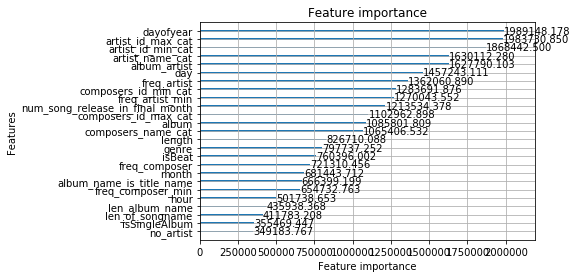

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))
lgb.plot_importance(clf, max_num_features=25,importance_type='gain')


In [7]:
clf.feature_importance()

array([ 53879,  37905, 172664, 220885,  15338, 129888, 183332, 173563,
       138169,  13425,   6827,  11632,   6565,  10465, 266175, 237063,
       105612,      0, 285389, 218672,  21700,  17460, 112509,  11010,
         2687,  19327,  17336,   1066,   8592, 224951, 247024,  19849,
       248372, 290236, 295526, 237361, 212819, 174647, 231990, 129053,
         8658], dtype=int32)

In [10]:
%matplotlib qt5
lgb.plot_tree(clf)